In [1]:
import sys
sys.path.append("..")
import functions
from functions import *
data = load_dataset()

# CW Project Overview: Gradient Boosting Regression (GBR) Pipeline

This notebook outlines the methodology I used to develop, optimise, and evaluate a Gradient Boosting Regression (GBR) model on a dataset called **Space Missions Dataset**.


## 1. Data Importation and Initial Thoughts
- I imported the dataset and examined its structure, dimensionality, and variable types (numerical and categorical).
- Conducted an initial assessment of missing values, potentially problematic features and scaling issues.



## 2. Data Cleaning and Pre-Processing
- Addressed missing or inconsistent data through removal eg converting 'Launch dates' from strings to numeric value of days past Jan 01 2000, a fixed date for all data points or One Hot Encoding **Mission Target** as not to skew the data in any way.
- Standardised datatype formats and ensured numerical variables were suitable for analysis, eg standardising **Mission Cost** as a GBR is susceptible to scaling issues if one column has variables much much larger than others (most data is e-1, **Mission cost** was e11 +), for improved model performance..
- Removed metadata columns such as **Mission ID** and **Mission Name**.
- Kept only features expected to influence mission success.



## 3. Train–Test split and Model Choice
- Divided the dataset into training and testing subsets using a reproducible split at 80%.
- A Gradient Boost Regressor was chosen because:
    - It performs well on small datasets (<500 rows).
    - Unlike Random Forests, GBR builds trees sequentially, where each tree corrects the residuals of the previous one,     introducing less errors than if it was built coninuousley.
    - Ideal for detecting subtle or weak trends.
    - Generally achieves better accuracy than single decision trees.



## 4. Feature Engineering
- Feature engineering was employed to enhance the predictive performance of the GBR model. This was done to improve relations that are nonlinear and under-represented between features and the target **Mission Success**. 
- It reduces skewness in the data and stabilises the trained model.
- Expands the feature space with derived features, linking previously uninteracting feature columns; possibly deriving new patterns and trends. 
- Reduces risk of overfitting


### Method:
- Polynomial and interaction terms to introduce nonlinear structure.
- Logarithmic and other transformations to normalise skewed variables.
- Binning or categorical encodings.
- Normalisation or scaling of continuous variables.


### Impact
- Improved tree-splitting behaviour due to reduced feature skew as well as cleaner splits leading to netter representation.
- More informative feature space, reducing the need for deep trees to model complex relationships.
- More stable convergence during boosting due to appropriately scaled inputs.


## 5. Gradient Boosting Regressor Construction
- Implemented an initial GBR model with default hyperparameters.
- Found baseline performance to compare against during optimisation.
- Selected GBR due to its strong performance on structured datasets and ability to model nonlinear dependencies without extensive preprocessing.



## 6. Hyperparameter Optimisation (GridSearchCV)
A systematic grid search was conducted to identify optimal hyperparameter values, including:
- Number of estimators  
- Learning rate  
- Maximum tree depth   
- Minimum samples per split and per leaf  
- Choice of loss function  

### Purpose:
- Explores model behaviour across a defined hyperparameter space.
- To balance bias and skewness through controlled parameter tuning; resulting in a stronger model for the data.
- To ensure that the final model configuration maximises predictive performance.



## 7. Model Evaluation
- Analysed key performance metrics such as Root Mean Square Error (RMSE), and the coefficient of determination (R²) for both testing and training.



## 8. Feature Importance and Model Interpretation

### Feature Importance 
- Computed and plotted feature importance values to determine which variables most strongly influenced the model output.
- Assessed the contribution of engineered features relative to original variables.

### Decision Tree 
- Extracted and visualised a representative tree from the ensemble using `sklearn.tree.plot_tree`.
- Examined hierarchical splitting patterns to understand decision boundaries and variable interactions.



In [3]:
data.head()

,Mission ID,Mission Name,Launch Date,Target Type,Target Name,Mission Type,Distance from Earth (light-years),Mission Duration (years),Mission Cost (billion USD),Scientific Yield (points),Crew Size,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons),Launch Vehicle
0,MSN-0001,Mission-1,2025-01-01,Star,Titan,Colonization,7.05,5.2,526.68,64.3,21,100.0,731.88,99.78,SLS
1,MSN-0002,Mission-2,2025-01-08,Exoplanet,Betelgeuse,Colonization,41.76,23.0,234.08,84.4,72,89.6,4197.41,45.72,Starship
2,MSN-0003,Mission-3,2025-01-15,Asteroid,Mars,Exploration,49.22,28.8,218.68,98.6,16,98.6,4908.00,36.12,Starship
3,MSN-0004,Mission-4,2025-01-22,Exoplanet,Titan,Colonization,26.33,17.8,232.89,36.0,59,90.0,2569.05,40.67,Starship
4,MSN-0005,Mission-5,2025-01-29,Exoplanet,Proxima b,Mining,8.67,9.2,72.14,96.5,31,73.2,892.76,12.40,Starship


##  Variable feature altering

Features such as **target type** need to be changed from categorical to numerical features in order to pass to the machine learning algorithm. This is the first attempt made, but ultimately gave the wrong outcome that would biass the final model. 

In [ ]:
#changing target type to numerical values
data_aug= data.copy()#create a copy of the data to augment
target_types= data['Target Type'].unique()#giving each unoque target type a numerical value
target_type_mapping= {target: idx for idx, target in enumerate(target_types)}#maps target type to numerical val using enumerate each iteration


print("mapping a catagory to numerical val.")
for category, value in target_type_mapping.items():#print the key
    print(f"{category}: {value}")

data_aug['Target Type'] = data['Target Type'].map(target_type_mapping)#applying the target map to the data copy, data_aug

mapping a catagory to numerical val.
Star: 0
Exoplanet: 1
Asteroid: 2
Moon: 3
Planet: 4


Changing all other columns with categorical data to numerical values such as **Mission type**, **Target Name** and **Launch vehicle**.

In [ ]:
#also changing all other non mumerical values to numerical values
#this includes columns: 'Mission Type', 'Target Name' and 'launch vehicle'

target_names= data_aug['Target Name'].unique()#giving each unique target name a numerical value
mission_types = data_aug['Mission Type'].unique()
launch_vehicle = data_aug['Launch Vehicle'].unique()
target_name_map= {target: idx for idx, target in enumerate(target_names)}#maps target type to numerical val using enumerate each iteration
mission_types_map= {mission: idx for idx, mission in enumerate(mission_types)}
launch_vehicle_map= {vehicle: idx for idx, vehicle in enumerate(launch_vehicle)}

for category, value in target_name_map.items():#print the key
    print(f"{category}: {value}")
print("\n")
for category, value in mission_types_map.items():#print the key
    print(f"{category}: {value}")
print("\n")
for category, value in launch_vehicle_map.items():#print the key
    print(f"{category}: {value}")

data_aug['Target Name'] = data_aug['Target Name'].map(target_name_map)
data_aug['Mission Type'] = data_aug['Mission Type'].map(mission_types_map)
data_aug['Launch Vehicle'] = data_aug['Launch Vehicle'].map(launch_vehicle_map)
data_aug.head()

Titan: 0
Betelgeuse: 1
Mars: 2
Proxima b: 3
Ceres: 4
Io: 5
Europa: 6


Colonization: 0
Exploration: 1
Mining: 2
Research: 3


SLS: 0
Starship: 1
Ariane 6: 2
Falcon Heavy: 3


,Mission ID,Mission Name,Launch Date,Target Type,Target Name,Mission Type,Distance from Earth (light-years),Mission Duration (years),Mission Cost (billion USD),Scientific Yield (points),Crew Size,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons),Launch Vehicle
0,MSN-0001,Mission-1,2025-01-01,0,0,0,7.05,5.2,526.68,64.3,21,100.0,731.88,99.78,0
1,MSN-0002,Mission-2,2025-01-08,1,1,0,41.76,23.0,234.08,84.4,72,89.6,4197.41,45.72,1
2,MSN-0003,Mission-3,2025-01-15,2,2,1,49.22,28.8,218.68,98.6,16,98.6,4908.00,36.12,1
3,MSN-0004,Mission-4,2025-01-22,1,0,0,26.33,17.8,232.89,36.0,59,90.0,2569.05,40.67,1
4,MSN-0005,Mission-5,2025-01-29,1,3,2,8.67,9.2,72.14,96.5,31,73.2,892.76,12.40,1


##  Realisation

It is discovered that in order for my data to not be skewed by my numerical transformations, implementation of a one hot encoder is needed as not to introduce bias. This negates the ordinary structure of a numerical numbering system by making all values their own column and equal to 1 or 0 so that for example the regressor model doesn't think that launch vehicle 3 is better than launch vehicle 2 because of the higher numerical value when in reality the SLS rocket is not ranked lower than the Falcon 9 rocket just because of its number. 

For the One Hot Encoder I used 'https://www.geeksforgeeks.org/machine-learning/ml-one-hot-encoding/ and https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html'

1- Below a copy of data is made and then one hot encoded following the tutorial from  'https://www.youtube.com/watch?v=rsyrZnZ8J2o'. 
2- Here another problem was encountered to do with numerical heirarchy and strings. The relation between **launch date** and **mission success** could not be plotted as there was no meaningful way to derive a relation between a string and an integer percentage. This was avoided be counting the days since Jan 1st 2000 following the conversion example at 'https://www.geeksforgeeks.org/python/python-pandas-to_datetime/'
3- the gradient boost model is then constructed with rudamentory values for depth, estimators and learning rate. This is because later a grid search algorithm is performed on the model to study the best hyperparameters that descirbe the data.

[I did consider using another type of encoding called Cyclical Encoding but decided against it as it would offer little to no benefit for my feature plots and could harm my model as it makes sense that a rocket launched close to the year 2000 is less technologically advanced than one launched in 2030, 'https://www.geeksforgeeks.org/cyclical-encoding-in-machine-learning/'.]

In [ ]:
#one hot encoding my data. I am using the video One Hot Encoder with Python Machine Learning (Scikit-Learn) as reference https://www.youtube.com/watch?v=rsyrZnZ8J2o
data_2= data.copy()

#changing launch date to numerical value (number of days since 1st Jan 2000) https://www.geeksforgeeks.org/python/python-pandas-to_datetime/
data_2['Launch Date'] = pd.to_datetime(data_2['Launch Date'])#convert to datetime object
reference_date = pd.to_datetime('2000-01-01')#reference date
data_2['Launch Date'] = (data_2['Launch Date'] - reference_date).dt.days#convert to number of days since reference date

catagory_cols = ['Target Type', 'Target Name', 'Mission Type', 'Launch Vehicle']#listing the catagories for the one hot encoder
#number_cols = ['Launch Date','Distance from Earth (light-years)','Mission Duration (years)','Mission Cost (billion USD)','Scientific Yield (points)','Crew Size','Mission Success (%)','Fuel Consumption (tons)','Payload Weight (tons)']
X = data_2.drop(['Mission Success (%)', 'Mission ID', 'Mission Name'], axis=1)#splitting the data into useful features and target variable
y = data_2['Mission Success (%)']

catagory_cols = [c for c in catagory_cols if c in X.columns]#filtering the catagory columns 
number_cols = [c for c in X.columns if c not in catagory_cols]#filtering the numerical columns
print(catagory_cols)
print(number_cols)

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), catagory_cols)
    ], remainder='passthrough'
)
gbr = GradientBoostingRegressor(loss='absolute_error',      # uses L1 loss instead of default squared error
    learning_rate=0.1,          # step size for each tree
    n_estimators=300,           # number of sequential trees
    max_depth=5,                # if 1, each tree is a "stump" (very shallow)
    random_state=42,            # for reproducibility
    max_features=5,              # max features considered per split
    min_samples_leaf=5,         # min samples per leaf node
    subsample=0.8               # fraction of samples used for fitting each tree
)

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('gradient boost regressor', gbr)])
model.fit(X_train, y_train)
pred_y = model.predict(X_test)



['Target Type', 'Target Name', 'Mission Type', 'Launch Vehicle']
['Launch Date', 'Distance from Earth (light-years)', 'Mission Duration (years)', 'Mission Cost (billion USD)', 'Scientific Yield (points)', 'Crew Size', 'Fuel Consumption (tons)', 'Payload Weight (tons)']


## Output of first test

The output of the rudementory GBR was printed below as a baseline for all other parameter searches to compare against. The RMSE gives the average predicted values distance from the datas value and the test R2 score gives the models predictive accuracy for unseen data. 
These are adequate values for a non-optimised model with testing score being 0.82 (1 being a perfect fit) and RMSE only a value 4.25.

In [ ]:
#printing out the model performance parameters pre grid search

test_rmse = mean_squared_error(y_test, pred_y) ** (1 / 2)
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"R² / training accuracy score: {train_accuracy:.4f}")
print(f"R² / testing accuracy score: {test_accuracy:.4f}")
print('Root mean Square error: {:.2f}'.format(test_rmse))

R² / training accuracy score: 0.9682
R² / testing accuracy score: 0.8242
Root mean Square error: 4.25


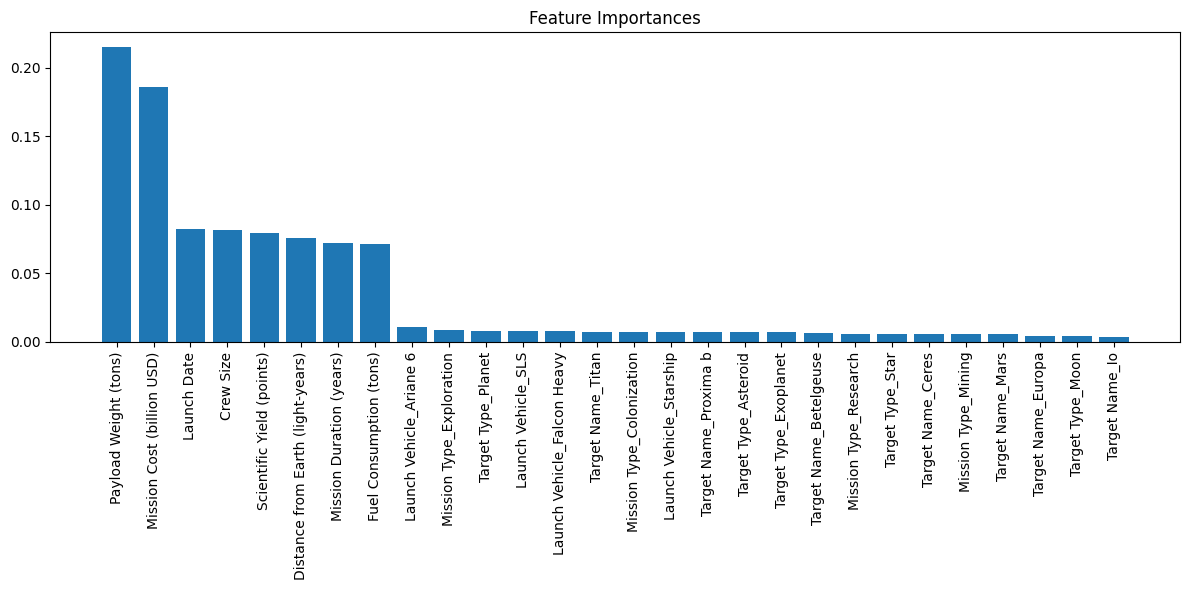

In [ ]:
#feature importance plot

gbr_trained = model.named_steps['gradient boost regressor']
feature_names = model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(catagory_cols) #get feature names out after preprocessing

numeric_names = [c for c in X_train.columns if c not in catagory_cols]
feature_names = list(feature_names) + numeric_names
importances = gbr_trained.feature_importances_

feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})#making a new dataframe for feature importance plotting
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)#sort the dataframe by importance

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[feat_imp.index], align="center")
plt.xticks(range(len(importances)), feat_imp['Feature'], rotation=90)
plt.tight_layout()

##  Feature Importance Plot

From the graph above it can be seen that the two most contributing factors to the GBR model are **Payload weight** and **Mission Cost**, both of which have not been scaled so far. This raises the question as to wheter the GBR actually sees them as most direct link to **Mission success** or are the overwhelmongly large number approx e11 times larger than all other featuers significantly skewing the data for the model. Research shows that feature engineering and scaling the larger features as well as inventing some new ones to highlight new/ underplayed relationships would greatly improve the predictabilty skills of the model and therefore improve accuracy.

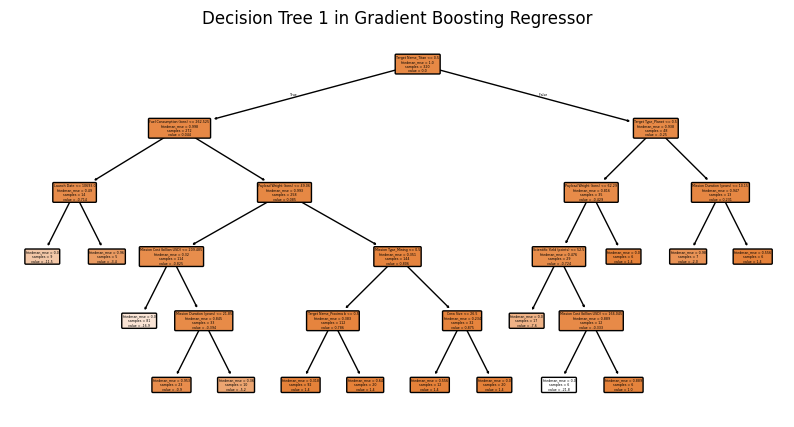

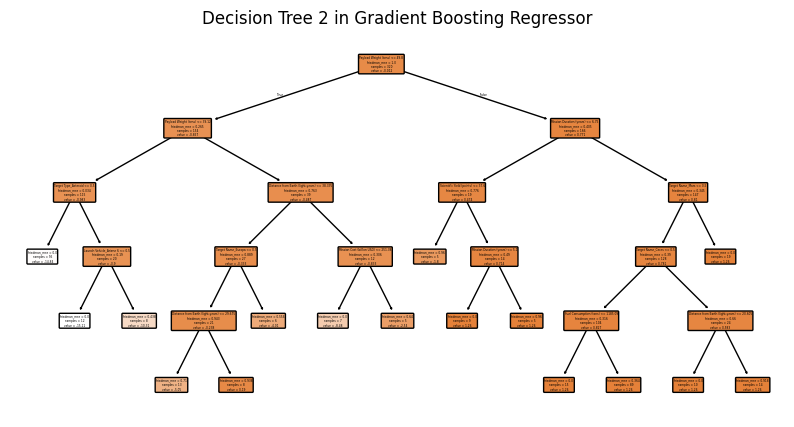

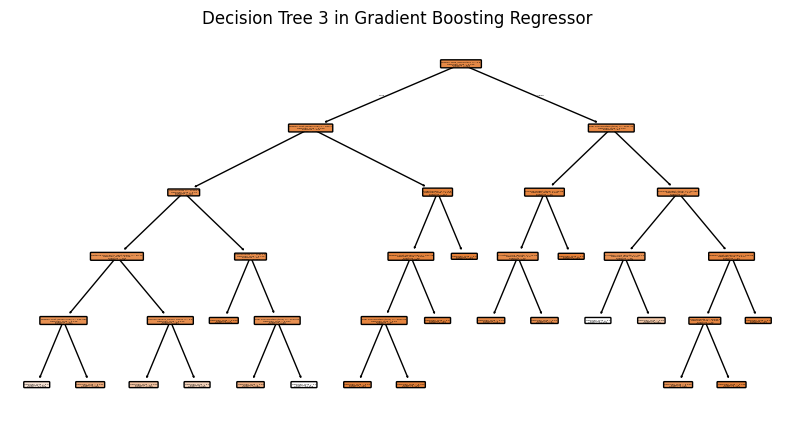

In [ ]:
#visualising the decision trees in the gradient boost regressor
for i in range(3):  # plot first 3 trees
    plt.figure(figsize=(10,5))
    tree.plot_tree(gbr_trained.estimators_[i][0], filled=True, feature_names=feature_names, rounded=True)
    plt.title(f"Decision Tree {i+1} in Gradient Boosting Regressor")
    plt.show()

##  Model tuning and hyperparamters

Using a grid search Cross validation technique with the basic paramaters for a gbr, the gridsearch algorithm ran my model n number of times until it has found the best parameters to describe my data points.

'https://scikit-learn.org/stable/modules/grid_search.html and https://www.geeksforgeeks.org/machine-learning/hyperparameter-tuning-using-gridsearchcv-and-kerasclassifier/'

In [ ]:

param_grid = {#  here i asked chatgpt for help choosing the hyperparameters to tune and their ranges making sure i understood the reason for each decision and that physically they'd make sense 
    'gradient boost regressor__n_estimators': [100, 200, 300],#   this should be enough estimators to avoid overfitting while still capturing trends in the data
    'gradient boost regressor__learning_rate': [0.01, 0.05, 0.1],#   how large and how many steps and how quick the steps are to get into the valley (the optimal answer)
    'gradient boost regressor__max_depth': [1, 2, 3],#   I need to avoid overfitting so i will keep the depth low
    'gradient boost regressor__subsample': [0.7, 0.85, 1.0],#   increases model robustness by training on random subsets of data
    'gradient boost regressor__max_features': ['sqrt', 'log2', None] 
}

# Grid search for Gradient Boosting Regressor
# change cv = 3 for testing and faster performance, otherwise it'll take approx 6 mins to run on my machine
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1)# cv = 5 gives a well rounded cross validation fold number, too few and i risk introducing randomness and so higher varience, too many and computatioanl cost increases significantly. n-jobs is -1 because it uses all processors available
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


,estimator,Pipeline(step...sample=0.8))])
,param_grid,"{'gradient boost regressor__learning_rate': [0.01, 0.05, ...], 'gradient boost regressor__max_depth': [1, 2, ...], 'gradient boost regressor__max_features': ['sqrt', 'log2', ...], 'gradient boost regressor__n_estimators': [100, 200, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('cat', ...)]"


In [ ]:
grid_search.best_params_

{'gradient boost regressor__learning_rate': 0.05,
 'gradient boost regressor__max_depth': 2,
 'gradient boost regressor__max_features': None,
 'gradient boost regressor__n_estimators': 200,
 'gradient boost regressor__subsample': 0.7}

In [ ]:
#updating the gradient boost regressor with the best hyperparameters found from grid search
improved_model = grid_search.best_estimator_
improved_model.fit(X_train, y_train)
pred_y2 = improved_model.predict(X_test)

In [ ]:
#printing out the model performance parameters post grid search/re-evaluating the model with the best hyperparameters found from grid search

test_rmse2 = mean_squared_error(y_test, pred_y2) ** (1 / 2)
train_accuracy2 = improved_model.score(X_train, y_train)
test_accuracy2 = improved_model.score(X_test, y_test)
print(f"R² / training accuracy score: {train_accuracy2:.4f} vs pre-tuning {train_accuracy:.4f}")
print(f"R² / testing accuracy score: {test_accuracy2:.4f} vs pre-tuning {test_accuracy:.4f}")# here we see we are higher as closer to 1 the better and means the model is better fitting to the testing data
print('Root mean Square error: {:.2f}'.format(test_rmse2), 'vs pre-tuning {:.2f}'.format(test_rmse))#here we should be smaller as values are closer to predicted model

R² / training accuracy score: 0.8783 vs pre-tuning 0.9682
R² / testing accuracy score: 0.8457 vs pre-tuning 0.8242
Root mean Square error: 3.98 vs pre-tuning 4.25


Here, whilst R2 accuracy for the test may have dimished by 0.02, the RMSE is significantly less meaning that whilst the model is not a good at describing the data, it has a greatly improved accuracy with less error.

##  Feature Engineering and model improvements

### Initial Ideas
- total person years = crew size *mission duration (gives the number of man hours required for longer or more harch missions like colonisation or mining)
- cost per person year = mission cost/ total person years (the total payout the company will lose per year until the mission is successful and they turn a profit)
- scientific efficiency = scientific yield/ cost
- scientific yield per year = scientific yield / mission duration
- 'MpG' = payload weight / fuel consumption (miles per gallon equivalent) (how fuel efficient are the missions leading to some space bodies being more efficient to go to than others possibly due to gravity assists, varying trajectories like asteroids or many small trips like colonisation of a planet or moon)
- human efficiency = scientific yield / crew size * mission duration (If the crew is working at a maximum human efficiency, it would make sense that the mission has a higher success rate)
- cost per LY = mission cost / distance from earth (light-years)
- energy efficiency = fuel consumption / payload weight *distance from earth
- technology improvement = launch date (days since 1st Jan 2000) *scientific yield / mission success (%) (this would have to be logged as it gives a very large number even if scaled. Would make sense that an improvement in space travel leads to a higher chance of success on a space mission) 

### Non-linear interactions 
- Top speeds of each type of rocket, scaled to be in 1000s of mph
- Total mission duration there and back using distances in Ly and speeds in 1000mph

### Model improvements
Previously mentioned problems with scaling resolved changing features like cost and payload weight using standard scalar 

' https://www.geeksforgeeks.org/machine-learning/what-is-feature-engineering/'

In [ ]:
data_2.columns

Index(['Mission ID', 'Mission Name', 'Launch Date', 'Target Type',
       'Target Name', 'Mission Type', 'Distance from Earth (light-years)',
       'Mission Duration (years)', 'Mission Cost (billion USD)',
       'Scientific Yield (points)', 'Crew Size', 'Mission Success (%)',
       'Fuel Consumption (tons)', 'Payload Weight (tons)', 'Launch Vehicle'],
      dtype='object')

In [ ]:
X_ohe = preprocessor.transform(data_2.drop(columns=["Mission ID", "Mission Name", "Mission Success (%)"]))
catagories = model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(catagory_cols)
numericals = [c for c in data_2.drop(columns=["Mission ID", "Mission Name", "Mission Success (%)"]).columns if c not in catagory_cols]
all_cols = list(catagories)+numericals
New_df = pd.DataFrame(X_ohe, columns=all_cols)

In [ ]:

# interaction features
New_df['total person years'] = New_df['Crew Size'] * New_df['Mission Duration (years)']
New_df['cost per person year'] = New_df['Mission Cost (billion USD)'] / New_df['total person years']
New_df['scientific efficiency'] = New_df['Scientific Yield (points)'] / New_df['Mission Cost (billion USD)']
New_df['scientific yield per year'] = New_df['Scientific Yield (points)'] / New_df['Mission Duration (years)']
New_df['MpG'] = New_df['Payload Weight (tons)'] / New_df['Fuel Consumption (tons)']
New_df['human efficiency'] = New_df['Scientific Yield (points)'] / (New_df['Crew Size'] * New_df['Mission Duration (years)'])
New_df['cost per LY'] = New_df['Mission Cost (billion USD)'] / New_df['Distance from Earth (light-years)']
New_df['energy efficiency'] = New_df['Fuel Consumption (tons)'] / (New_df['Payload Weight (tons)'] * New_df['Distance from Earth (light-years)'])
New_df['technology improvement'] = New_df['Launch Date'] * New_df['Scientific Yield (points)'] / data_2['Mission Success (%)']
New_df['technology improvement Log'] = np.log1p(New_df['technology improvement'])
New_df=New_df.drop(columns = ['technology improvement'])

# geographical features
top_speeds = {
    'Launch Vehicle_SLS': 24500,    #mph need to be scaled to 1000 mph
    'Launch Vehicle_Starship': 25031,
    'Launch Vehicle_Ariane 6': 24372,
    'Launch Vehicle_Falcon Heavy': 24600
}
New_df['Top Speed 1000mph'] = sum(New_df[col] * speed for col, speed in top_speeds.items()) / 1000

LY_miles = 5.879e+12 
target_list = target_columns = ['Target Type_Exoplanet', 'Target Type_Moon', 'Target Type_Planet']

def total_time(row):
    if any(row[col] >= 1 for col in target_list):#  I had to ask chatgpt for help wih this if statement line as i was having trouble getting it to work. I have left my original line commented so you can see where I got too
    #if New_df[target] for target,speed in target_list:  # target types for planets, exoplanets and moons
        round_trip_miles = row['Distance from Earth (light-years)'] * LY_miles*2
        speed_mph = row['Top Speed 1000mph']*1000  # converting back to mph
        time_hours = round_trip_miles / speed_mph
        time_years = time_hours / (24*365.25)
        #scaling as to not skew the data too much
        time_years_scaled = time_years / 1e6

        return row['Mission Duration (years)']+ time_years_scaled #this gives time in years that number in the millions, skewing my data so I will need to normalise each result as not to affect the gradient boost as it is scale sensative
    else:
        return row['Mission Duration (years)']
New_df['Total Mission Time ( Mega years, (1,000,000))'] = New_df.apply(total_time, axis=1)

#mean cost per target type post one hot encoding
New_df["Target Type"] = New_df[[
    "Target Type_Exoplanet",
    "Target Type_Moon",
    "Target Type_Planet",
    "Target Type_Star",
    "Target Type_Asteroid"
]].idxmax(axis=1)
New_df["Target Type"] = New_df["Target Type"].str.replace("Target Type_", "")
mean_cost_map = New_df.groupby("Target Type")["Mission Cost (billion USD)"].mean()
New_df["Mean Cost per Target Type"] = New_df["Target Type"].map(mean_cost_map)

#scaling the larger columns like Mission cost and Fuel consumption and mean cost
scalar = StandardScaler()
New_df['Mission Cost Log'] = np.log1p(New_df['Mission Cost (billion USD)'])
New_df['Mission Cost Scaled'] = scalar.fit_transform(New_df[['Mission Cost Log']])
New_df=New_df.drop(columns = ['Mission Cost (billion USD)'])
New_df['Fuel Consumption (tons) Scaled']=scalar.fit_transform(New_df[['Fuel Consumption (tons)']])
New_df=New_df.drop(columns = ['Fuel Consumption (tons)'])
New_df['mean Cost Log'] = np.log1p(New_df['Mean Cost per Target Type'])
New_df['Mean Cost per Target Type Scaled'] = scalar.fit_transform(New_df[['mean Cost Log']])
New_df=New_df.drop(columns = ['Mean Cost per Target Type','mean Cost Log','Mission Cost Log','Target Type'])

#bins for scientific yield
bins = [0,25,50,75,100]
labels = [0,1,2,3]
New_df['Scientific Yield Catagories']=pd.cut(New_df['Scientific Yield (points)'],bins=bins, labels=labels,include_lowest=True)
key = {0:'Fail 0-25',1:'minor success 26-50',2:'success 51-75',3:'major success 75+'}
print(key)


{0: 'Fail 0-25', 1: 'minor success 26-50', 2: 'success 51-75', 3: 'major success 75+'}


In [ ]:
#splitting the new dataframe with engineered features into training and testing sets
y = data_2['Mission Success (%)']
X_train2, X_test2, y_train2, y_test2 = train_test_split(New_df, y, test_size=0.2, random_state=42)
model = GradientBoostingRegressor(
    n_estimators=200,   #using the old best hyperparameters found from grid search as a starting point to find new ones later
    learning_rate=0.05,
    max_depth=2,
    subsample=0.7,
    max_features=None,
    random_state=42
)
model.fit(X_train2, y_train2)
pred_y2 = model.predict(X_test2)
test_rmse2 = mean_squared_error(y_test2, pred_y2) ** (1 / 2)
train_accuracy2 = model.score(X_train2, y_train2)
test_accuracy2 = model.score(X_test2, y_test2)
print(f"R² / training accuracy score: {train_accuracy2:.4f}")
print(f"R² / testing accuracy score: {test_accuracy2:.4f} ")
print('Root mean Square error: {:.2f}'.format(test_rmse2))

R² / training accuracy score: 0.9417
R² / testing accuracy score: 0.8306 
Root mean Square error: 4.17


In [ ]:
print(model)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=200,
                          random_state=42, subsample=0.7)


In [ ]:
#tuning paramas for new dataset with engineered features
param_grid2 = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [1, 2, 3],
    'subsample': [0.7, 0.85, 1.0],
    'max_features': ['sqrt', 'log2', None] 
}

# Grid search for Gradient Boosting Regressor
# change cv = 3 for testing and faster performance, otherwise it'll take approx 6 mins to run on my machine
grid_search = GridSearchCV(estimator = model, param_grid = param_grid2, cv = 3, n_jobs = -1, verbose = 1)# cv = 5 gives a well rounded cross validation fold number, too few and i risk introducing randomness and so higher varience, too many and computatioanl cost increases significantly. n-jobs is -1 because it uses all processors available
grid_search.fit(X_train2, y_train2)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


,estimator,GradientBoost...subsample=0.7)
,param_grid,"{'learning_rate': [0.01, 0.05, ...], 'max_depth': [1, 2, ...], 'max_features': ['sqrt', 'log2', ...], 'n_estimators': [100, 200, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [ ]:
grid_search.best_params_

{'learning_rate': 0.01,
 'max_depth': 2,
 'max_features': None,
 'n_estimators': 300,
 'subsample': 0.7}

In [ ]:
#update model with new best params
model = grid_search.best_estimator_
model.fit(X_train2, y_train2)
pred_y3 = model.predict(X_test2)

test_rmse3 = mean_squared_error(y_test2, pred_y3) ** (1 / 2)
train_accuracy3 = model.score(X_train2, y_train2)
test_accuracy3 = model.score(X_test2, y_test2)
print(f"R² / training accuracy score: {train_accuracy3:.4f}")
print(f"R² / testing accuracy score: {test_accuracy3:.4f}")
print('Root mean Square error: {:.2f}'.format(test_rmse3))

R² / training accuracy score: 0.8929
R² / testing accuracy score: 0.8374
Root mean Square error: 4.09


## Final Model performance

Here i can see that model performance is somewhat improved with feature engineering and hyperparameter tuning, however the RMSE score has increased slightly which is not optimal and means my average data point prediction is slightly worse than before. This is to be expected though because of the new features I have introduced which have also created more data and therefore more complexity and 'noise' for the model.

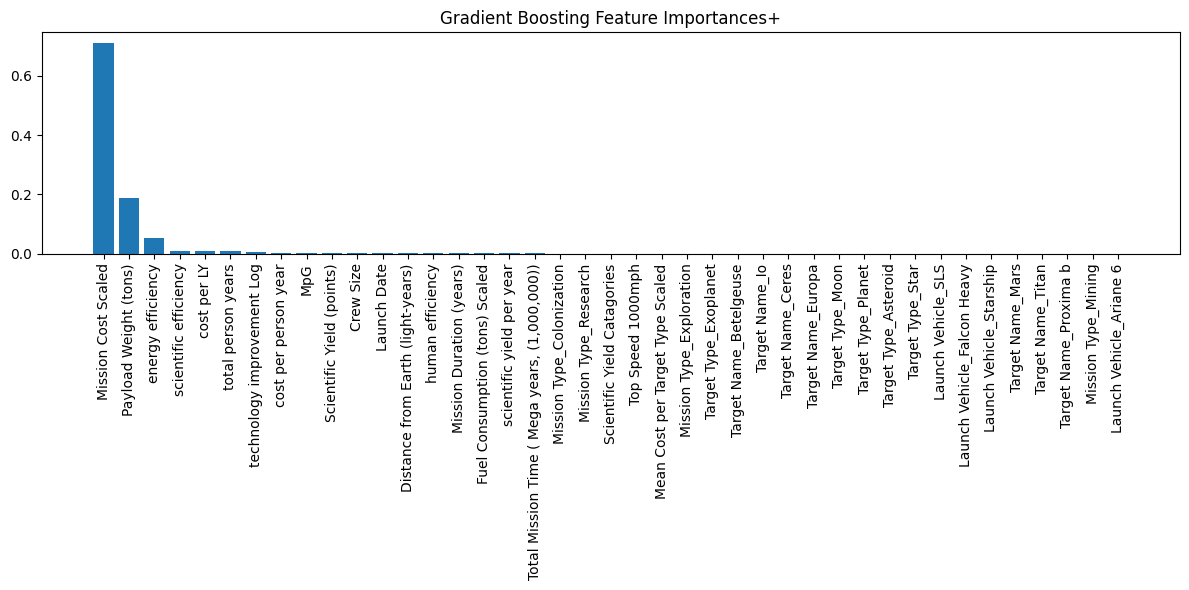

In [ ]:
#feature importance plot for final model
#best_model = grid_search.best_estimator_

importances = model.feature_importances_
feature_names = X_train2.columns

importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

plt.figure(figsize=(12,6))
plt.title("Gradient Boosting Feature Importances+")
plt.bar(importance_df["feature"], importance_df["importance"],align='center')
plt.xticks(range(len(importances)), importance_df['feature'], rotation=90)
plt.tight_layout()


## Final Feature Importance
Here my feature importance is a lot more skewed than before. This relies almost soley on Mission Cost Scaled, a parameter I created myself to stop skewing of the data by other features. Originally the most important was payload weight, meaning that that being unscaled was overshadowing all other features such as this.


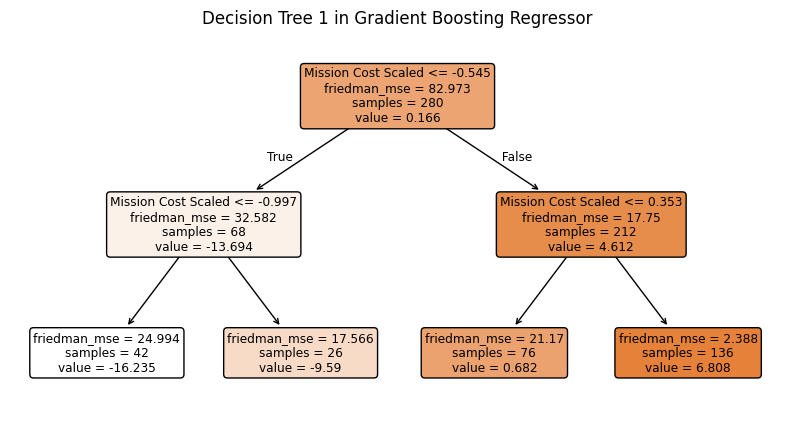

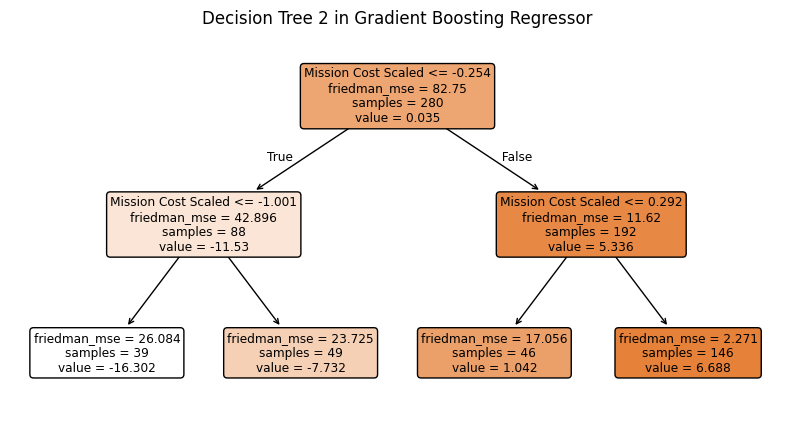

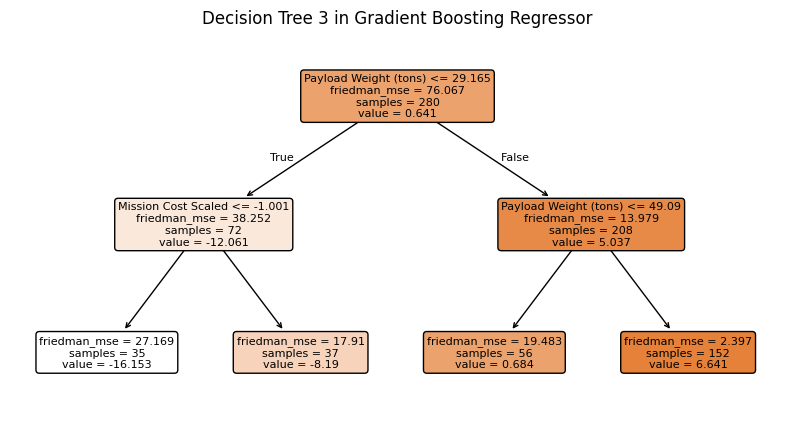

In [ ]:
#decision tree plots for final model
feature_names = list(New_df.columns) 
for i in range(3):  # plot first 3 trees
    plt.figure(figsize=(10,5))
    tree.plot_tree(model.estimators_[i][0], filled=True, feature_names=feature_names, rounded=True)
    plt.title(f"Decision Tree {i+1} in Gradient Boosting Regressor")
    plt.show()